In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
num_class = 10
epoch = 20

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
keras.backend.image_data_format()

'channels_last'

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

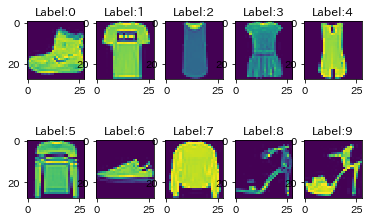

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title('Label:'+str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
48704/60000 [=======================>......] - ETA: 45s - loss: 0.5117 - accuracy: 0.8182

In [ ]:
model.evaluate(x_test, y_test)